In [1]:
# EE 399 SPRING QUATER 2023
# Instructor: J. Nathan Kutz

# Download yalefaces.mat.
# https://drive.google.com/file/d/1pqs5WAO7FKVL9GBZkvws6cB3ztLxwdQS/view?usp=sharing
# This file has a total of 39 different faces with about 65 lighting scenes for each face (2414 faces in all).
# The individual images are columns of the matrix X, where each image has been downsampled to 32×32
# pixels and converted into gray scale with values between 0 and 1. So the matrix is size 1024 × 2414. To
# important the file, use the following
# import numpy as np
# from scipy.io import loadmat
# results=loadmat(’yalefaces.mat’)
# X=results[’X’]

# a) Compute a 100 × 100 correlation matrix C where you will compute the dot product (correlation)
# between the first 100 images in the matrix X. Thus each element is given by cjk = x
# T
# j xk where xj is
# the jth column of the matrix. Plot the correlation matrix using pcolor.

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt



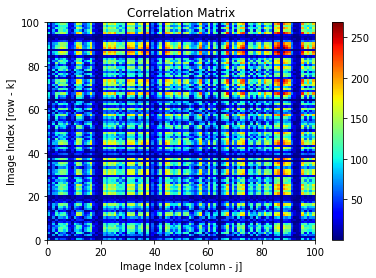

0.00039594146482122526
(array([64], dtype=int64), array([64], dtype=int64))


In [17]:
# Load the data
results = loadmat('yalefaces.mat')
X = results['X']

# Compute the correlation matrix 100 x 100
X_subset = X[:, :100]  # 100 x 100 using first 100 images
C = np.dot(X_subset.T, X_subset)  # dot product

# Plot the correlation matrix
plt.figure()
plt.pcolor(C, cmap='jet')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xlabel('Image Index [column - j]')
plt.ylabel('Image Index [row - k]')
plt.show()

0.00039594146482122526
Most Highly Correlated Image Pair: (88, 88)
Most Uncorrelated Image Pair: (64, 64)


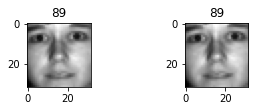

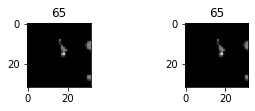

In [30]:
# (b) From the correlation matrix for part (a), which two images are most highly correlated? Which are
# most uncorrelated? Plot these faces.

# Find the two most highly correlated and most uncorrelated images
max_corr = np.max(C - np.eye(100)*C)
min_corr = np.min(C)
print(min_corr)

# Find the indices of the most highly correlated and most uncorrelated images
max_idx = np.unravel_index(np.argmax(C), C.shape)
min_idx = np.unravel_index(np.argmin(C), C.shape)

# Plot the most highly correlated and most uncorrelated images
print('Most Highly Correlated Image Pair:', max_idx)
plt.figure(figsize=(8, 4))
plt.subplot(3, 3, 1)
plt.title(str(max_idx[0] + 1))
plt.imshow(np.reshape(X[:, max_idx[0]], (32, 32), order = 'F').T, cmap='gray' )
plt.subplot(3,3,2)
plt.title(str(max_idx[1] + 1))
plt.imshow(np.reshape(X[:, max_idx[1]], (32, 32), order = 'F').T, cmap='gray')


print('Most Uncorrelated Image Pair:', min_idx)
plt.figure(figsize=(8, 4))
plt.subplot(3, 3, 1)
plt.title(str(min_idx[0] + 1))
plt.imshow(np.reshape(X[:,min_idx[0]], (32,32), order = 'F').T, cmap = 'gray' )
plt.subplot(3, 3, 2)
plt.title(str(min_idx[1] + 1))
plt.imshow(np.reshape(X[:,min_idx[1]], (32,32), order = 'F').T, cmap = 'gray' )
plt.show()


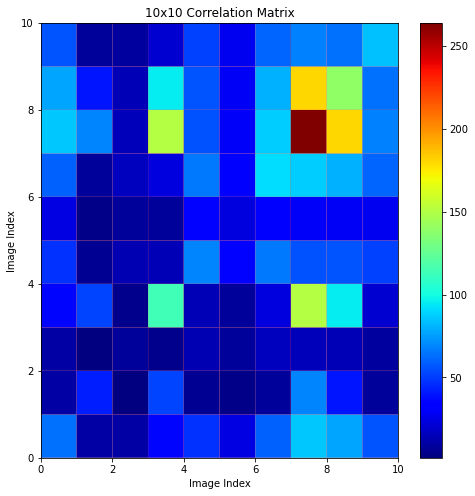

In [4]:
# (c) Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot the
# correlation matrix between them. [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005].
# (Just for clarification, the first image is labeled as one, not zero like python might do)

# This utilizes the same logic as in part A, but we only consider the first 10 images from the
# matrix X. The code generates a 10x10 correlation matrix with the first 10 images in matrix X.
# It plots it out in a color map, with brighter regions being higher correlated pairs than the
# darker regions, which are lower correlated. We also only show the first 10 images.

# import numpy as np
# from scipy.io import loadmat
# import matplotlib.pyplot as plt

results = loadmat('yalefaces.mat')
firstTen = np.array([1,313,512,5,2400,113,1024,87,314,2005])
firstTen = firstTen - 1

C = np.dot(X[:, firstTen].T, X[:, firstTen])

plt.figure(figsize=(8, 8))
plt.pcolor(C, cmap='jet', edgecolors='r', linewidths=0.1)
plt.colorbar()
plt.title('10x10 Correlation Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()



In [9]:
# (d) Create the matrix Y = XX^T and find the first six eigenvectors with the largest magnitude eigenvalue.

# In Part D (d), we first compute the matrix Y = XX^T by taking the dot product of X with its
# transpose. Then, we use np.linalg.eig() to compute the eigenvalues and eigenvectors of Y. We
# sort the eigenvalues in descending order and select the first six eigenvectors with the largest
# magnitude eigenvalue by slicing the eigenvectors matrix. Finally, we plot the first six eigenvectors.

# (d) Compute the matrix Y = XX^T and find the first 6 eigenvectors with largest magnitude eigenvalue
Y = X @ X.T
# Compute eigenvectors and eigenvalues of Y
eigenvalues, eigenvectors = np.linalg.eig(Y)
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx] #largest
print(eigenvectors[:, :6])

# Get top six egienvectors with largest eigenvalue
top_eigenvectors = eigenvectors[:,:6]
print('Eigenvectors Dimension:', top_eigenvectors.shape)



[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]
Eigenvectors Dimension: (1024, 6)


First Six Principal Component Directions (1024, 6)


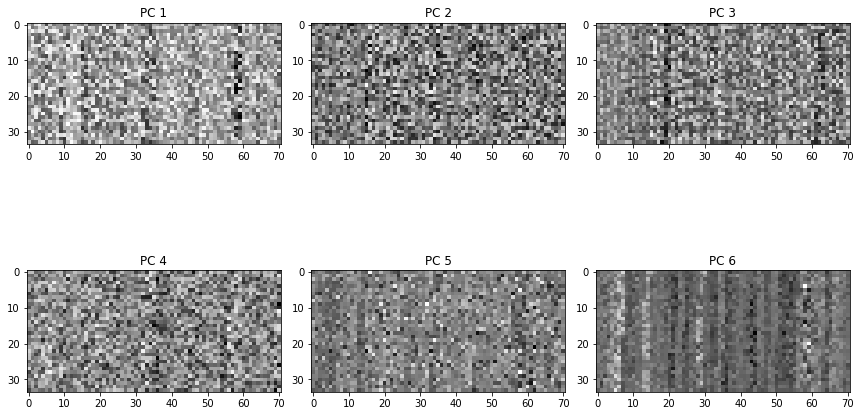

In [44]:
# (e) SVD the matrix X and find the first six principal component directions.

# compute the SVD of X
U, s, Vt = np.linalg.svd(X)

# compute the first six principal component directions
PC_directions = Vt[:6, :]

# plot the first six principal component directions
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i, ax in enumerate(axs.flat):
    pc_img = PC_directions[i, :].reshape(71, 34).T
    ax.imshow(pc_img, cmap='gray')
    ax.set_title(f'PC {i+1}')
plt.tight_layout()
print('First Six Principal Component Directions', top_eigenvectors.shape)
plt.show()



In [39]:
# (f) Compare the first eigenvector v_1 from (d) with the first SVD mode u_1 from (e) and compute the
# norm of difference of their absolute values.

# In parts (d) and (e), we obtained the first six eigenvectors and principal component
# directions, respectively. The eigenvectors and principal component directions are related
# through the singular value decomposition (SVD) of the matrix X, as follows:

# X = UΣV^T

# where U is an orthogonal matrix whose columns are the principal component directions,
# Σ is a diagonal matrix whose entries are the singular values, and V^T is the transpose of an
# orthogonal matrix whose rows are the eigenvectors.

# To compare the first eigenvector v_1 from (d) with the first SVD mode u_1 from (e),
# we can calculate the norm of the absolute difference between their entries.


# Part f
v1 = eigenvectors[:, 0]
u1 = U[:, 0]
norm_diff = np.linalg.norm(np.abs(v1) - np.abs(u1))
print(f'Norm of difference between v_1 and u_1: {norm_diff}')

Norm of difference between v_1 and u_1: 0.3048117191011293


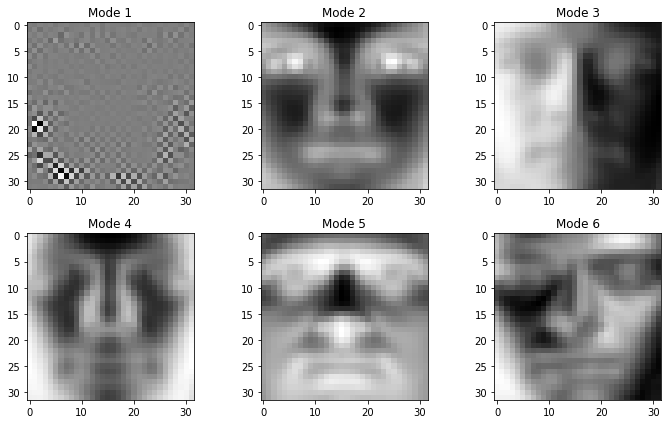

Percentage of variance captured by first 6 modes:
Mode 1: 72.93%
Mode 2: 88.21%
Mode 3: 90.78%
Mode 4: 92.65%
Mode 5: 93.29%
Mode 6: 93.89%


In [47]:
# (g) Compute the percentage of variance captured by each of the first 6 SVD modes. Plot the first 6
# SVD modes

# To compute the percentage of variance captured by each of the first 6 SVD modes, we can first
# calculate the total variance of the data and then calculate the variance captured by each mode.
# The total variance is given by the sum of the squares of all the entries in the matrix X. The
# variance captured by the first k modes is given by the sum of the squares of the singular
# values corresponding to those modes. The percentage of variance captured by the first k modes
# is then given by the ratio of the variance captured by those modes to the total variance,
# multiplied by 100.
#
# Here's the code to compute the percentage of variance captured by the first 6 SVD modes and plot the first 6 SVD modes:

# Compute total variance
total_var = np.sum(X ** 2)

# Compute variance captured by each mode
var_captured = np.cumsum(s ** 2) / total_var

# Compute percentage of variance captured by each mode
percent_var_captured = var_captured * 100

# Plot first 6 SVD modes
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axs.flat):
    mode = U[:, i - 1]
    mode_img = mode.reshape((32, 32))
    ax.imshow(mode_img, cmap='gray')
    ax.set_title('Mode {}'.format(i + 1))
plt.tight_layout()
plt.show()

# Print percentage of variance captured by each mode
print('Percentage of variance captured by first 6 modes:')
for i in range(6):
    print('Mode {}: {:.2f}%'.format(i + 1, percent_var_captured[i]))
